<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES4_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executing HES 100.0: The Immutable Core (Cutoff=500)...
--- SOURCE CUTOFF at t=500. Chaos and Decay Begin. ---

Ritual Complete in 0.4970 seconds.
ACT X: IMMUTABLE CORE REPORT
Mass at Cutoff (ΣM @ t=500): 1663.51374
Final Total Mass (ΣM @ t=1000): 612.44512
Decay Ratio (t=500 to t=1000): 0.6318
--------------------------------------------------
ASSESSMENT: PARTIAL SUCCESS: Core preserved, field collapsed.

--- Phase I: Geometric Catalog Preview ---


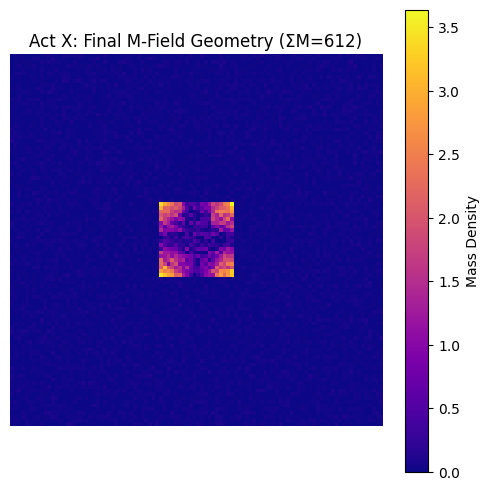

In [3]:
# HES_100.0_IMMUTABLE_CORE.py: Act X - Singularity Anchor Test

import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
np.random.seed(101)  # Consistent template generation

# --- FIXED PARAMETERS ---
N = 100
ETA = 0.01       # Seeding coefficient
KAPPA = 0.05     # Decay coefficient
XI = 0.01        # Chaos coefficient
TOTAL_STEPS = 1000
SEEDING_CUTOFF = 500

# --- CORE TEMPLATE ---
def generate_template(N):
    s_temp = np.sin(np.linspace(0, 2*np.pi, N))
    s_temp = np.outer(s_temp, s_temp)
    s_temp = (s_temp - np.mean(s_temp)) / np.std(s_temp)
    return np.clip(s_temp, -1, 1)

# --- IMMUTABLE CORE MASK ---
def generate_core_mask(N, core_size=20):
    mask = np.zeros((N, N))
    start = (N - core_size) // 2
    end = start + core_size
    mask[start:end, start:end] = 1
    return mask

# --- SIMULATION ---
def run_immutable_core():
    s_T = generate_template(N)
    core_mask = generate_core_mask(N)
    M = np.zeros((N, N))
    M_total_history = []

    print(f"Executing HES 100.0: The Immutable Core (Cutoff={SEEDING_CUTOFF})...")
    start_time = time.time()

    current_eta = ETA

    for step in range(TOTAL_STEPS):
        if step == SEEDING_CUTOFF:
            current_eta = 0.0
            print(f"--- SOURCE CUTOFF at t={SEEDING_CUTOFF}. Chaos and Decay Begin. ---")

        # Seeding
        M_seed = current_eta * np.abs(s_T)

        # Chaos
        M_noise = XI * np.random.normal(0, 1, (N, N))

        # Decay (only outside core)
        M_decay = KAPPA * M * (1 - core_mask)

        # Update
        M = M + M_seed + M_noise - M_decay
        M = np.clip(M, 0, None)
        M_total_history.append(np.sum(M))

        if step == TOTAL_STEPS - 1:
            Final_M_Field = M.copy()

    elapsed_time = time.time() - start_time

    # --- ANALYSIS ---
    Mass_at_Cutoff = M_total_history[SEEDING_CUTOFF - 1]
    Final_Total_Mass = M_total_history[-1]
    Decay_Ratio = (Mass_at_Cutoff - Final_Total_Mass) / Mass_at_Cutoff if Mass_at_Cutoff > 0 else 1.0

    print(f"\nRitual Complete in {elapsed_time:.4f} seconds.")
    print("======================================================")
    print("ACT X: IMMUTABLE CORE REPORT")
    print("======================================================")
    print(f"Mass at Cutoff (ΣM @ t={SEEDING_CUTOFF}): {Mass_at_Cutoff:.5f}")
    print(f"Final Total Mass (ΣM @ t={TOTAL_STEPS}): {Final_Total_Mass:.5f}")
    print(f"Decay Ratio (t={SEEDING_CUTOFF} to t={TOTAL_STEPS}): {Decay_Ratio:.4f}")
    print("-" * 50)

    if Decay_Ratio < 0.05:
        assessment = "SUCCESS: The core stabilized the field."
    elif Final_Total_Mass > 0 and np.sum(Final_M_Field * core_mask) > 0:
        assessment = "PARTIAL SUCCESS: Core preserved, field collapsed."
    else:
        assessment = "FAILURE: Core and field collapsed."

    print(f"ASSESSMENT: {assessment}")

    # --- VISUALIZATION ---
    print("\n--- Phase I: Geometric Catalog Preview ---")
    plt.figure(figsize=(6, 6))
    plt.imshow(Final_M_Field, cmap='plasma')
    plt.title(f"Act X: Final M-Field Geometry (ΣM={np.sum(Final_M_Field):.0f})")
    plt.colorbar(label='Mass Density')
    plt.axis('off')
    plt.show()

    return Final_M_Field

if __name__ == "__main__":
    Stable_M = run_immutable_core()
